# Exploratory Data Analysis of Dataset
# Dataset: https://www.kaggle.com/datasets/a2015003713/militaryaircraftdetectiondataset

Duplicate key in file '/Users/arjunrajpal/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


Number of files in each subdirectory in archive/crop are:
F18: 1181 files
F16: 1179 files
P3: 195 files
Tu95: 247 files
AV8B: 363 files
RQ4: 279 files
B2: 424 files
Tu160: 254 files
Vulcan: 340 files
V22: 751 files
SR71: 248 files
E2: 383 files
F4: 535 files
A10: 574 files
C130: 842 files
Be200: 255 files
F35: 1000 files
US2: 578 files
XB70: 151 files
Tornado: 389 files
F15: 1147 files
J20: 453 files
Rafale: 466 files
U2: 258 files
F14: 458 files
F22: 562 files
YF23: 131 files
B1: 546 files
F117: 312 files
AG600: 194 files
EF2000: 510 files
A400M: 383 files
C17: 464 files
C5: 338 files
MQ9: 309 files
C2: 743 files
E7: 128 files
Su57: 292 files
B52: 453 files
Mirage2000: 364 files
Mig31: 314 files
Su34: 310 files
JAS39: 443 files


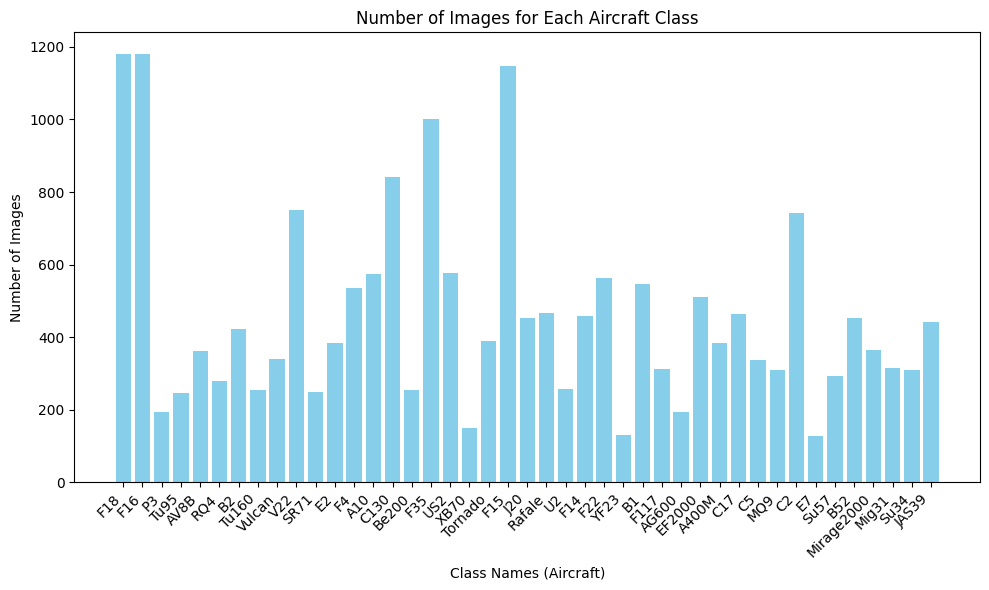

Total Number of Images:  19746


In [1]:
import os
import matplotlib.pyplot as plt

# Specify the directory for which you want to list subdirectories
directory_path = "archive/crop"

image_count = 0

def count_files_in_subdirectories(directory_path):
    subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]
    subdirectory_counts = {}
    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(directory_path, subdirectory)
        files = [f for f in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, f))]
        subdirectory_counts[subdirectory] = len(files)
    return subdirectory_counts
subdirectory_counts = count_files_in_subdirectories(directory_path)

print("Number of files in each subdirectory in", directory_path, "are:")
for subdirectory, count in subdirectory_counts.items():
    print(f"{subdirectory}: {count} files")
    image_count += count


subdirectory_counts = count_files_in_subdirectories(directory_path)


subdirectories = list(subdirectory_counts.keys())
file_counts = list(subdirectory_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(subdirectories, file_counts, color='skyblue')
plt.xlabel('Class Names (Aircraft)')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Aircraft Class')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('file_counts_bar_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


print("Total Number of Images: ", image_count)

In [ ]:
import os
import shutil
import random
from torchvision import datasets, transforms

# Define the directory paths
original_directory = "archive/crop"
train_directory = "data/train"
test_directory = "data/test"

# Function to create directories if they don't exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Create train and test directories
create_directory(train_directory)
create_directory(test_directory)

# Split ratio for train and test data
split_ratio = 0.8  # 80% train, 20% test

# Function to perform data splitting and augmentation
def split_and_augment_data(original_directory, train_directory, test_directory, split_ratio):
    class_folders = os.listdir(original_directory)
    for folder in class_folders:
        class_path = os.path.join(original_directory, folder)
        images = os.listdir(class_path)
        random.shuffle(images)
        train_size = int(len(images) * split_ratio)
        
        # Create train and test folders for each class
        train_class_path = os.path.join(train_directory, folder)
        test_class_path = os.path.join(test_directory, folder)
        create_directory(train_class_path)
        create_directory(test_class_path)
        
        # Split images into train and test sets
        train_images = images[:train_size]
        test_images = images[train_size:]
        
        # Copy images to train directory
        for image in train_images:
            img_path = os.path.join(class_path, image)
            shutil.copy(img_path, os.path.join(train_class_path, image))
        
        # Copy images to test directory
        for image in test_images:
            img_path = os.path.join(class_path, image)
            shutil.copy(img_path, os.path.join(test_class_path, image))

# Split and augment data
split_and_augment_data(original_directory, train_directory, test_directory, split_ratio)

# Image augmentation using PyTorch transforms
data_transforms = transforms.Compose([
    transforms.RandomRotation(20),  # Rotate images randomly up to 20 degrees
    transforms.RandomResizedCrop(224),  # Resize and crop images randomly
    transforms.ToTensor(),
])

# Load the datasets
train_dataset = datasets.ImageFolder(train_directory, transform=data_transforms)
test_dataset = datasets.ImageFolder(test_directory, transform=data_transforms)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
